In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.stats import poisson
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import json
from datetime import date, timedelta
import math
np.random.seed(seed=42)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 16})
# plt.rcParams["font.family"] = "Times New Roman"
# sns.set_style("whitegrid", rc={'font.family': 'Times New Roman', 'font.size': 16})
sns.set_style("whitegrid", rc={'font.size': 16})

from constants import LOCATION_CHOOSEN, LOCATION_CHOOSEN_2, OUTPUT_DIR, DATA_CACHE_DIR, OPTIMAL_VALUES_FILE, STRINGENCY_BASED_GDP

In [2]:
data_path = os.path.join(DATA_CACHE_DIR, LOCATION_CHOOSEN + "_merged_data.csv")
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
else:
    df = pd.read_excel("owid-covid-data.xlsx")
    df = df.loc[df['iso_code'] == LOCATION_CHOOSEN]
    df.to_csv(data_path, index=False)

In [3]:
start_date = date(2020, 5, 1)
end_date = date(2022, 11, 1)
delta = timedelta(days=1)

worldometers_dates = []
worldometers_total_cases = []
worldometers_total_recovered = []
worldometers_active_cases = []

while start_date <= end_date:
    date_str = start_date.strftime("%Y%m%d")
    data_path_worldometer = os.path.join(DATA_CACHE_DIR, "worldometer", date_str + ".csv")
    if os.path.exists(data_path_worldometer):
        worldometer_df = pd.read_csv(data_path_worldometer)
        worldometer_df.columns = ['country' if col.startswith('Country') else col for col in worldometer_df.columns]
        worldometer_df.columns = worldometer_df.columns.str.lower().str.replace(' ', '')
        date_data = ""
        total_cases = 0
        total_recovered = 0
        worldometer_df_specified_location = worldometer_df.loc[(worldometer_df["country"].str.lower() == LOCATION_CHOOSEN_2.lower())]
        date_data = date_str[:4] + "-" + date_str[4:6] + "-" + date_str[6:]
        total_cases = 0.0 if math.isnan(worldometer_df_specified_location["totalcases"].item()) else worldometer_df_specified_location["totalcases"].item()
        active_cases = 0.0 if math.isnan(worldometer_df_specified_location["activecases"].item()) else worldometer_df_specified_location["activecases"].item()
        total_recovered = 0.0 if math.isnan(worldometer_df_specified_location["totalrecovered"].item()) else worldometer_df_specified_location["totalrecovered"].item()
        print(date_data, total_cases, total_recovered, type(total_recovered), math.isnan(total_recovered))
        worldometers_dates.append(date_data)
        worldometers_total_cases.append(total_cases)
        worldometers_total_recovered.append(total_recovered)
        worldometers_active_cases.append(active_cases)
    else:
        print(data_path_worldometer, "DOES NOT EXIST -- COLLECT DATA MANUALLY")
    start_date += delta

2020-05-01 35043 9068.0 <class 'float'> False
2020-05-02 37257 10007.0 <class 'float'> False
2020-05-03 42505 11775.0 <class 'float'> False
2020-05-04 42670 11782.0 <class 'float'> False
2020-05-05 49400 14142.0 <class 'float'> False
2020-05-06 52987 15331.0 <class 'float'> False
2020-05-07 53045 15331.0 <class 'float'> False
2020-05-08 56516 16867.0 <class 'float'> False
2020-05-09 62808 19301.0 <class 'float'> False
2020-05-10 62939 19358.0 <class 'float'> False
2020-05-11 70768 22549.0 <class 'float'> False
2020-05-12 74243 24420.0 <class 'float'> False
2020-05-13 78055 26400.0 <class 'float'> False
2020-05-14 81990 27969.0 <class 'float'> False
2020-05-15 82103 27977.0 <class 'float'> False
2020-05-16 90615 34220.0 <class 'float'> False
2020-05-17 95648 36794.0 <class 'float'> False
2020-05-18 95698 36795.0 <class 'float'> False
2020-05-19 101261 39233.0 <class 'float'> False
2020-05-20 106475 42309.0 <class 'float'> False
2020-05-21 118226 48553.0 <class 'float'> False
2020-05-22 

2020-10-28 7988853 7257194.0 <class 'float'> False
2020-10-29 8041051 7315989.0 <class 'float'> False
2020-10-30 8088851 7373375.0 <class 'float'> False
2020-10-31 8137119 7432829.0 <class 'float'> False
2020-11-01 8184082 7491513.0 <class 'float'> False
2020-11-02 8229322 7544798.0 <class 'float'> False
2020-11-03 8267623 7603121.0 <class 'float'> False
2020-11-04 8313876 7656478.0 <class 'float'> False
2020-11-05 8364086 7711809.0 <class 'float'> False
2020-11-06 8411724 7765966.0 <class 'float'> False
2020-11-07 8462080 7819886.0 <class 'float'> False
2020-11-08 8507754 7868968.0 <class 'float'> False
2020-11-09 8553864 7917373.0 <class 'float'> False
2020-11-10 8591730 7959406.0 <class 'float'> False
2020-11-11 8636011 8013783.0 <class 'float'> False
2020-11-12 8684039 8064548.0 <class 'float'> False
2020-11-13 8737746 8122580.0 <class 'float'> False
2020-11-14 8773479 8163572.0 <class 'float'> False
2020-11-15 8814902 8205728.0 <class 'float'> False
2020-11-16 8845617 8249579.0 <c

2021-05-06 21242580 17407470 <class 'int'> False
2021-05-07 21491598 17612351 <class 'int'> False
2021-05-08 21892676 17930960 <class 'int'> False
2021-05-09 22296414 18317404 <class 'int'> False
2021-05-10 22662575 18671222 <class 'int'> False
2021-05-11 22992517 19027304 <class 'int'> False
2021-05-12 23340938 19382642 <class 'int'> False
2021-05-13 23703665 19734823 <class 'int'> False
2021-05-14 24046809 20079599 <class 'int'> False
2021-05-15 24372907 20432898 <class 'int'> False
2021-05-16 24684077 20795335 <class 'int'> False
2021-05-17 24965463 21174076 <class 'int'> False
2021-05-18 25228996 21596512 <class 'int'> False
2021-05-19 25771405 22348683 <class 'int'> False
2021-05-20 26030024 22705590 <class 'int'> False
2021-05-21 26031991 22712735 <class 'int'> False
2021-05-22 26285069 23059017 <class 'int'> False
2021-05-23 26530132 23425467 <class 'int'> False
2021-05-24 26946102 24044364 <class 'int'> False
2021-05-25 27122158 24278735 <class 'int'> False
2021-05-26 27156382 

2021-10-27 34215653 33597339.0 <class 'float'> False
2021-10-28 34231809 33614434.0 <class 'float'> False
2021-10-29 34246157 33627632.0 <class 'float'> False
2021-10-30 34260470 33641175.0 <class 'float'> False
2021-10-31 34275364 33655842.0 <class 'float'> False
2021-11-01 34285814 33668560.0 <class 'float'> False
2021-11-02 34285814 33668560.0 <class 'float'> False
2021-11-03 34308140 33697740.0 <class 'float'> False
2021-11-04 34320142 33704365.0 <class 'float'> False
2021-11-05 34344087 33728923.0 <class 'float'> False
2021-11-06 34354966 33740926.0 <class 'float'> False
2021-11-07 34354966 33740926.0 <class 'float'> False
2021-11-08 34366614 33753488.0 <class 'float'> False
2021-11-09 34374455 33763237.0 <class 'float'> False
2021-11-10 34386786 33776053.0 <class 'float'> False
2021-11-11 34388422 33776802.0 <class 'float'> False
2021-11-12 34414186 33814080.0 <class 'float'> False
2021-11-13 34426036 33826483.0 <class 'float'> False
2021-11-14 34437307 33837859.0 <class 'float'>

2022-04-26 43065666 42523311.0 <class 'float'> False
2022-04-27 43065666 42525563.0 <class 'float'> False
2022-04-28 43068799 42528126.0 <class 'float'> False
2022-04-29 43072486 42530622.0 <class 'float'> False
2022-04-30 43075864 42533377.0 <class 'float'> False
2022-05-01 43079188 42536253.0 <class 'float'> False
2022-05-02 43082502 42536253.0 <class 'float'> False
2022-05-03 43085166 42541887.0 <class 'float'> False
2022-05-04 43088401 42544689.0 <class 'float'> False
2022-05-05 43091393 42547699.0 <class 'float'> False
2022-05-06 43094548 42547699.0 <class 'float'> False
2022-05-07 43098743 42554416.0 <class 'float'> False
2022-05-08 43102508 42557495.0 <class 'float'> False
2022-05-09 43105401 42560905.0 <class 'float'> False
2022-05-10 43107689 42563949.0 <class 'float'> False
2022-05-11 43110586 42566935.0 <class 'float'> False
2022-05-12 43113413 42570165.0 <class 'float'> False
2022-05-13 43116600 42570165.0 <class 'float'> False
2022-05-14 43119112 42576815.0 <class 'float'>

2022-10-12 44618533 44063406.0 <class 'float'> False
2022-10-13 44621319 44065963.0 <class 'float'> False
2022-10-14 44623997 44068557.0 <class 'float'> False
2022-10-15 44626427 44070935.0 <class 'float'> False
2022-10-16 44628828 44073308.0 <class 'float'> False
2022-10-17 44630888 44075149.0 <class 'float'> False
2022-10-18 44632430 44077068.0 <class 'float'> False
2022-10-19 44634376 44079485.0 <class 'float'> False
2022-10-20 44638011 44082064.0 <class 'float'> False
2022-10-21 44638636 44084646.0 <class 'float'> False
2022-10-22 44640748 44087748.0 <class 'float'> False
2022-10-23 44642742 44090349.0 <class 'float'> False
2022-10-24 44644076 44091906.0 <class 'float'> False
2022-10-25 44644938 44093409.0 <class 'float'> False
2022-10-26 44645768 44095180.0 <class 'float'> False
2022-10-27 44646880 44097072.0 <class 'float'> False
2022-10-28 44649088 44100691.0 <class 'float'> False
2022-10-29 44650714 44102852.0 <class 'float'> False
2022-10-30 44652266 44104933.0 <class 'float'>

In [4]:
worldometer_df = pd.DataFrame({"date": worldometers_dates, "total_cases_worldometer": worldometers_total_cases, "total_recovered_worldometer": worldometers_total_recovered, "active_cases_worldometer": worldometers_active_cases})
result = pd.merge(df, worldometer_df, on="date")
df = result

df['date'] = pd.to_datetime(df['date'])

In [5]:
# deaths are considered recovered: https://www.kaggle.com/code/lisphilar/covid-19-data-with-sir-model/notebook?scriptVersionId=28560520
# https://lisphilar.github.io/covid19-sir/02_data_engineering.html#1.-Data-cleaning
# Susceptible = Population - Confirmed
# Infected = Confirmed - Fatal - Recovered

# df['N'] = df['population']
# df['I'] = df['total_cases_worldometer']
# # df['I'] = df['active_cases_worldometer']
# # df['R'] = df['total_recovered_worldometer'] + df['people_fully_vaccinated'] + df['total_deaths']
# df['R'] = df['total_recovered_worldometer'] + df['people_fully_vaccinated'] + df['total_deaths']
# df['S'] = df['N'] - (df['I'] + df['R'])

# df['N'] = df['population']
# df['S'] = df['population'] - df['total_cases_worldometer'] - df['people_fully_vaccinated']
# df['I'] = df['total_cases_worldometer'] - df['total_deaths'] - df['total_recovered_worldometer']
# df['R'] = df['total_recovered_worldometer'] + df['total_deaths'] + df['people_fully_vaccinated']

df['N'] = df['population']
df['S'] = df['population'] - df['total_cases_worldometer'] - df['people_fully_vaccinated'] - df['total_recovered_worldometer']
df['I'] = df['total_cases_worldometer'] - df['total_recovered_worldometer']
df['R'] = df['total_recovered_worldometer'] + df['people_fully_vaccinated']

# df['N'] = df['population']
# df['I'] = df['total_cases_worldometer'] - df['total_recovered_worldometer'] - df['total_deaths']
# df['R'] = df['total_recovered_worldometer'] + df['people_fully_vaccinated'] + df['total_deaths']
# df['S'] = df['N'] - df['I'] - df['R']


# df['N'] = df['population']
# df['I'] = df['total_cases_worldometer']
# df['R'] = df['total_recovered_worldometer'] + df['people_fully_vaccinated']
# df['S'] = df['N'] - df['I'] - df['R']

# df['N'] = df['population']
# df['I'] = df['active_cases_worldometer']
# df['R'] = df['total_recovered_worldometer'] + df['people_fully_vaccinated']
# df['S'] =  df['population'] - (df['I'] + df['R'])

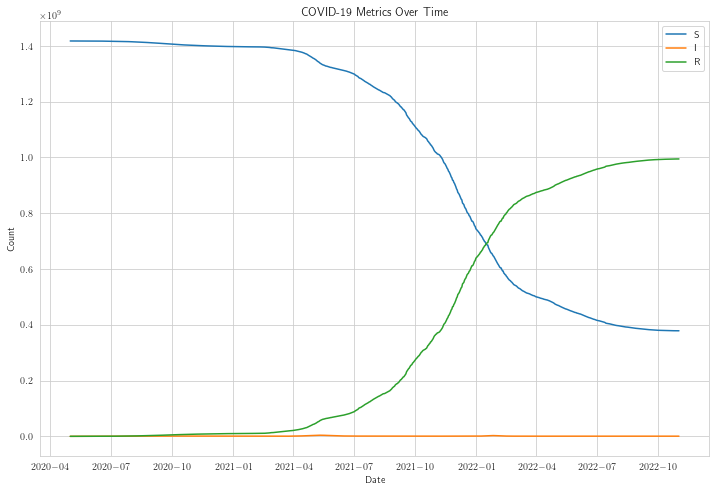

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(df['date'], df['S'], label='S')
plt.plot(df['date'], df['I'], label='I')
plt.plot(df['date'], df['R'], label='R')
plt.title('COVID-19 Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "metrics_over_time_" + LOCATION_CHOOSEN + ".png"))
plt.show()

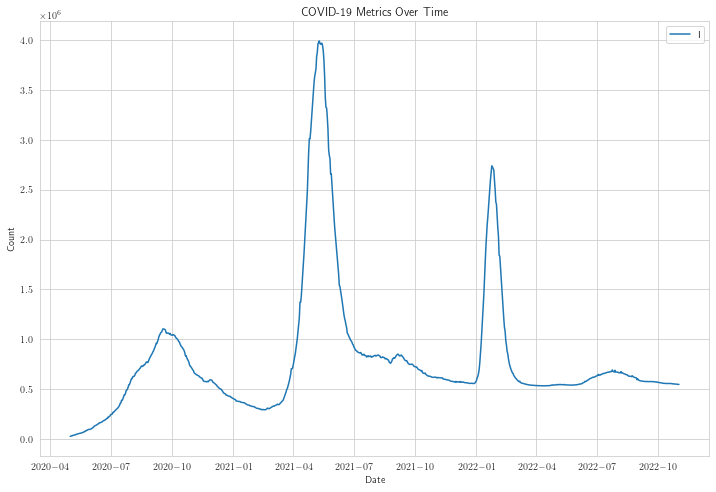

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(df['date'], df['I'], label='I')
plt.title('COVID-19 Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

## SIR Model

In [8]:
# def compute_cost(data, predictions):
#     # mse
#     return np.square(data - predictions).mean()

# def compute_cost(data, predictions):
#     # mae
#     return np.abs(data - predictions).mean()

def compute_cost(data, predictions, delta=1.0):
    # Huber loss
    residual = np.abs(data - predictions)
    condition = residual < delta
    squared_loss = 0.5 * np.square(residual)
    linear_loss = delta * (residual - 0.5 * delta)
    return np.where(condition, squared_loss, linear_loss).mean()

# def compute_cost(data, predictions):
#     # Relative Root Mean Squared Error
#     residual = data - predictions
#     root_mean_squared_error = np.sqrt(np.mean(np.square(residual)))
#     mean_data = np.mean(data)
#     return root_mean_squared_error / mean_data

In [9]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def integrate_system(params, y0, t, N):
    beta, gamma = params
    result = odeint(deriv, y0, t, args=(N, beta, gamma))
    return result

def objective_function(params, y0, t, N):
    predictions = integrate_system(params, y0, t, N)
    S, I, R = predictions.T
    cost = compute_cost(df['S'], S) + compute_cost(df['I'], I) +  compute_cost(df['R'], R)
    return cost

In [10]:
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item() + 1, df.loc[min(df.index), ['R']].item()
initial_guess_for_beta, initial_guess_for_gamma = 0.4, 1/15 
days_difference = (max(df['date']) - min(df['date'])).days
t = np.linspace(0, days_difference, days_difference + 1)

print(y0)

(1417121341.0, 25976.0, 16736.0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


optimal_beta: 0.04208479828695971 optimal_gamma: 0.02388356686032017
optimal_beta/optimal_gamma: 1.7620817917644795


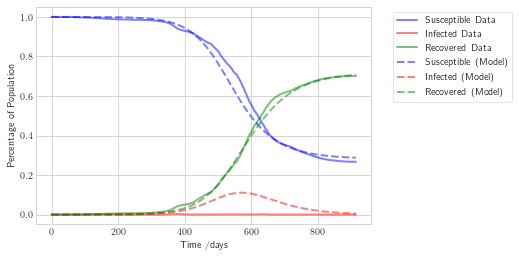

cost_without_lockdown: 85051490.53250012


In [11]:
initial_guesses = [initial_guess_for_beta, initial_guess_for_gamma]
result = minimize(
    objective_function,
    initial_guesses,
    args=(y0, t, N),
    method='Nelder-Mead',
)
optimal_beta, optimal_gamma = result.x
print(f"optimal_beta: {optimal_beta} optimal_gamma: {optimal_gamma}")
print(f"optimal_beta/optimal_gamma: {optimal_beta/optimal_gamma}")

ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma))
S, I, R = ret.T

plt.figure()
plt.plot(t, df['S']/N, 'b', alpha=0.5, lw=2, label='Susceptible Data')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')
plt.plot(t, df['R']/N, 'g', alpha=0.5, lw=2, label='Recovered Data')

plt.plot(t, S/N, 'b--', alpha=0.5, lw=2, label='Susceptible (Model)')
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (Model)')
plt.plot(t, R/N, 'g--', alpha=0.5, lw=2, label='Recovered (Model)')

plt.xlabel('Time /days')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_alpha(0.5)
plt.savefig(os.path.join(OUTPUT_DIR, "SIR_model_fit_without_lockdown_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

cost_without_lockdown = compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R)
print(f"cost_without_lockdown: {cost_without_lockdown}")

## SIR Model with Lockdown

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


optimal_beta: 0.4013340889432941 optimal_gamma: 0.09017476605499258
optimal_beta/optimal_gamma: 4.450625230328213


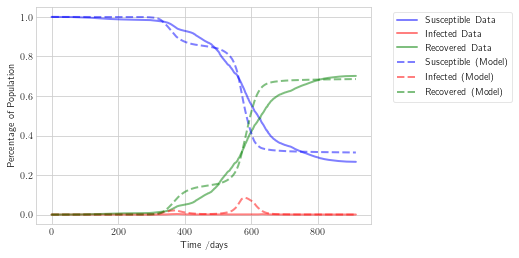

cost_with_lockdown: 98438821.45587364


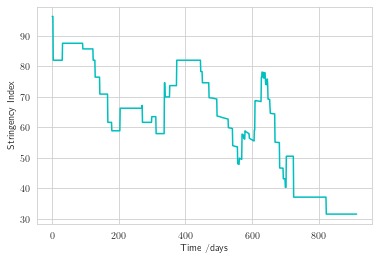

In [12]:
def deriv(y, t, N, beta, gamma, lockdown):
    S, I, R = y
    t = min(int(t), len(lockdown) - 1)  # Ensure t is an integer and within the range of 'lockdown'
    dSdt = -beta * (1 - lockdown[int(t)]) * S * I / N
    dIdt = beta * (1 - lockdown[int(t)]) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def integrate_system(params, y0, t, N, lockdown):
    beta, gamma = params
    result = odeint(deriv, y0, t, args=(N, beta, gamma, lockdown))
    return result

def objective_function(params, y0, t, N, lockdown):
    predictions = integrate_system(params, y0, t, N, lockdown)
    S, I, R = predictions.T
    cost = (compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R))
    return cost
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item(), df.loc[min(df.index), ['R']].item()
initial_guess_for_beta, initial_guess_for_gamma = 0.2, 1./10 
days_difference = (max(df['date']) - min(df['date'])).days
t = np.linspace(0, days_difference, days_difference + 1)
initial_guesses = [initial_guess_for_beta, initial_guess_for_gamma]
lockdown = list(df['stringency_index'].values / 100)
result = minimize(
    objective_function,
    initial_guesses,
    args=(y0, t, N, lockdown),
    method='Nelder-Mead',
)
optimal_beta, optimal_gamma = result.x
print(f"optimal_beta: {optimal_beta} optimal_gamma: {optimal_gamma}")
print(f"optimal_beta/optimal_gamma: {optimal_beta/optimal_gamma}")

ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, lockdown))
S, I, R = ret.T

plt.figure()
plt.plot(t, df['S']/N, 'b', alpha=0.5, lw=2, label='Susceptible Data')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')
plt.plot(t, df['R']/N, 'g', alpha=0.5, lw=2, label='Recovered Data')

plt.plot(t, S/N, 'b--', alpha=0.5, lw=2, label='Susceptible (Model)')
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (Model)')
plt.plot(t, R/N, 'g--', alpha=0.5, lw=2, label='Recovered (Model)')

plt.xlabel('Time /days')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_alpha(0.5)
plt.savefig(os.path.join(OUTPUT_DIR, "SIR_model_fit_with_lockdown_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

plt.plot(t, df['stringency_index'], 'c')
plt.xlabel('Time /days')
plt.ylabel('Stringency Index')
plt.grid(True)

cost_with_lockdown = compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R)
print(f"cost_with_lockdown: {cost_with_lockdown}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


optimal_beta: 0.40897034072952304 optimal_gamma: 0.09196829370123338 optimal_nu: 2.9044029843851936e-05
optimal_beta/optimal_gamma: 4.446862329077204


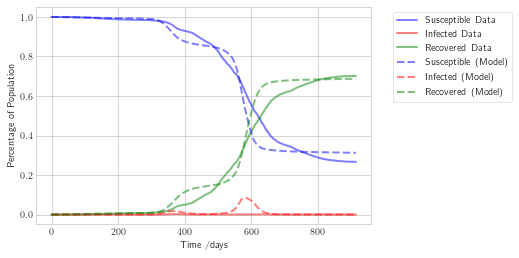

cost_with_lockdown: 94636860.38436058


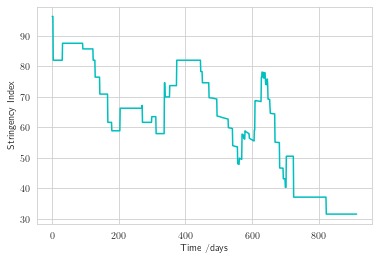

In [13]:
def deriv(y, t, N, beta, gamma, nu, lockdown):
    S, I, R = y
    t = min(int(t), len(lockdown) - 1)  # Ensure t is an integer and within the range of 'lockdown'
    dSdt = -beta * (1 - lockdown[int(t)]) * S * I / N - nu * S
    dIdt = beta * (1 - lockdown[int(t)]) * S * I / N - gamma * I
    dRdt = gamma * I + nu * S
    return dSdt, dIdt, dRdt

def integrate_system(params, y0, t, N, lockdown):
    beta, gamma, nu = params
    result = odeint(deriv, y0, t, args=(N, beta, gamma, nu, lockdown))
    return result

def objective_function(params, y0, t, N, lockdown):
    predictions = integrate_system(params, y0, t, N, lockdown)
    S, I, R = predictions.T
    cost = (compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R))
    return cost

N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item(), df.loc[min(df.index), ['R']].item()
# initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu = 0.2, 1./10, 0.0001
initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu = 0.2, 1./10, 0.000001
days_difference = (max(df['date']) - min(df['date'])).days
t = np.linspace(0, days_difference, days_difference + 1)
initial_guesses = [initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu]
lockdown = list(df['stringency_index'].values / 100)
result = minimize(
    objective_function,
    initial_guesses,
    args=(y0, t, N, lockdown),
    method='Nelder-Mead',
)
optimal_beta, optimal_gamma, optimal_nu = result.x
print(f"optimal_beta: {optimal_beta} optimal_gamma: {optimal_gamma} optimal_nu: {optimal_nu}")
print(f"optimal_beta/optimal_gamma: {optimal_beta/optimal_gamma}")

ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, optimal_nu, lockdown))
S, I, R = ret.T

plt.figure()
plt.plot(t, df['S']/N, 'b', alpha=0.5, lw=2, label='Susceptible Data')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')
plt.plot(t, df['R']/N, 'g', alpha=0.5, lw=2, label='Recovered Data')

plt.plot(t, S/N, 'b--', alpha=0.5, lw=2, label='Susceptible (Model)')
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (Model)')
plt.plot(t, R/N, 'g--', alpha=0.5, lw=2, label='Recovered (Model)')

plt.xlabel('Time /days')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_alpha(0.5)
plt.savefig(os.path.join(OUTPUT_DIR, "SIR_model_fit_with_lockdown_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

plt.plot(t, df['stringency_index'], 'c')
plt.xlabel('Time /days')
plt.ylabel('Stringency Index')
plt.grid(True)

cost_with_lockdown = compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R)
print(f"cost_with_lockdown: {cost_with_lockdown}")

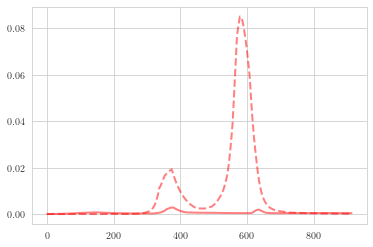

In [15]:
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (Model)')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')